## SA Using Bidirectional LSTM and GloVe embeddings

**Import text-hammer package for text preprocessing**

In [ ]:
!pip install text-hammer

     |████████████████████████████████| 115 kB 7.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the multidomain dataset**

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Sentimental Analysis Amazon Reviews/multidomain.csv')
df

,Review,Sentiment
0,Looks even better in person. Be careful to not...,1
1,When you don't want to spend a whole lot of ca...,1
2,"so the case came on time, i love the design. I...",1
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,0
4,"I liked it because it was cute, but the studs ...",1
...,...,...
99995,Didn't come with a box and was pretty pricy fo...,0
99996,Not the same quality as was advertised. It ar...,0
99997,The order was a fast delivery. But at first co...,0
99998,Wtf I did not buy this just wondering how you ...,0


**Splitting the features and labels**

In [ ]:
features = df.iloc[:,:-1]
labels = df.iloc[:,-1]
labels

0        1
1        1
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Sentiment, Length: 100000, dtype: int64

**Splitting training and testing**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.2,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.0125,random_state=42)

**Creating training, testing and validation dataframe**

In [ ]:
df_train = pd.DataFrame({"review":X_train['Review'],"sentiment":Y_train})
df_val = pd.DataFrame({"review":X_val['Review'],"sentiment":Y_val})
df_test = pd.DataFrame({"review":X_test['Review'],"sentiment":Y_test})
df_train

,review,sentiment
27156,I had been loaned this book by a friend and im...,1
76081,Picture quality was very poor.,0
26129,"Best quality, features, for the price! Would r...",1
10074,"Gt the product for free, basically purchased t...",0
75350,"Pay heed to Mr Carrey's warning, right at the ...",0
...,...,...
32231,"Bought mine at a Barnes and Nobles, and it did...",0
96487,"man, roller coaster tycoon is awesome, but thi...",0
20095,I suppose there is some dramatic action to thi...,0
30376,A interesting and enlighting book. It puts th...,1


**Counts of positive and negative reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


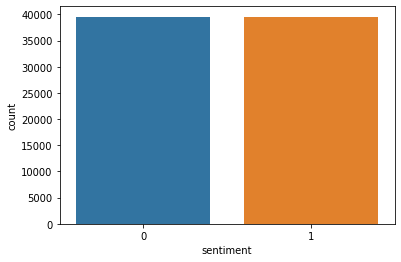

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df_train.sentiment)
plt.show()

**Text preprocessing using text hammer**

In [ ]:
import text_hammer as th

**Enable progress bar using tqdm**

In [ ]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

CPU times: user 589 µs, sys: 974 µs, total: 1.56 ms
Wall time: 1.48 ms


**Function to preprocess text reviews**

1.  Converting to lowercase 
2.  Expand short forms. Eg. I'm --> I am
3.  Removing emails 
4.  Removing Hyperlinks 
5.  Removing HTML tags 
6.  Removing special characters and accented characters
7.  Converting verbs to base form. Eg. drunk --> drink 



In [ ]:
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x: str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x))
    return(df)

**Applying preprocessing over training reviews**

In [ ]:
df_cleaned_train = text_preprocessing(df_train, 'review')

  0%|          | 0/79000 [00:00<?, ?it/s]

  0%|          | 0/79000 [00:00<?, ?it/s]

  0%|          | 0/79000 [00:00<?, ?it/s]

  0%|          | 0/79000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "http://www.ebay.com/itm/sega-genesis-3-system-console-controller-hookups-bundled-/381287963634?point=lh_defaultdomain_0&hash=item58c6889bf2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/0972683275?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "https://www.amazon.com/dp/b000s56380/ref=cm_cr_ryp_prd_tt

  0%|          | 0/79000 [00:00<?, ?it/s]

  0%|          | 0/79000 [00:00<?, ?it/s]

  0%|          | 0/79000 [00:00<?, ?it/s]

Categorize as positive -> 1 and negative -> 0

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(df_cleaned_train.sentiment.values)
y_test = to_categorical(df_test.sentiment.values)
y_val = to_categorical(df_val.sentiment.values)

**Tokenize the training reviews**

Total no. of words = 10000 (Vocabulary size)

In [ ]:
from keras.preprocessing.text import Tokenizer

num_words = 10000 
tokenizer = Tokenizer(num_words, lower = True)
df_total = pd.concat([df_cleaned_train['review'], df_test.review], axis = 0)
tokenizer.fit_on_texts(df_total)

**Padding zeroes to review vectors**

Since all reviews may not be of equal length, we pad the review vectors with zeroes to ensure fixed length vector for each review

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train=tokenizer.texts_to_sequences(df_cleaned_train['review']) # this converts texts into some numeric sequences 
X_train_pad = pad_sequences(X_train, maxlen = 300, padding='post') # this makes the length of all numeric sequences equal 
X_test = tokenizer.texts_to_sequences(df_test.review)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.review)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')
X_train_pad

array([[   2,   11,  100, ...,    0,    0,    0],
       [ 313,  136,   16, ...,    0,    0,    0],
       [  31,  136,  292, ...,    0,    0,    0],
       ...,
       [   2,  540,   51, ...,    0,    0,    0],
       [   5,  442,    3, ...,    0,    0,    0],
       [ 229,    4, 5399, ...,    0,    0,    0]], dtype=int32)

**Importing pre-trained GloVe model from gensim library**

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


**Defining the gensim weight matrix**

In [ ]:
import numpy as np

vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

(10000, 100)

**Getting the embeddings for the words from reviews and storing it in weight matrix**

In [ ]:
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100) #if word not found

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


**Define the Bi LSTM model**

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional

Bi-LSTM models consists of:



1.   Embedding layer   
                       input dimension = total no. of words in vocaburlary
                       output dimension = 100 (embedding dimension)
                       input length = 300 (review length)
                       weights = embeddings for each word in vocabulary

2.   Dropout - used for avoiding overfitting 
3.   Bi LSTM layers
4.   Softmax output layer - returns probabilities that each review is positive or negative



In [ ]:
EMBEDDING_DIM = 100
class_num = 2
model = Sequential()
model.add(Embedding(input_dim = num_words, 
                    output_dim = EMBEDDING_DIM, 
                    input_length = X_train_pad.shape[1],
                    weights = [gensim_weight_matrix], trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences = False)))
model.add(Dense(class_num, activation = 'softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 300, 200)         160800    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 300, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 300, 400)         641600    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 300, 400)          0

**CallBack**

1.   Check whether the validation accuracy decreases in between the epochs
2.   Saves the models as checkpoint as model.h5



In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

**Fitting the model over training set and validating using validation set**

In [ ]:
history_embedding = model.fit(X_train_pad, y_train,
                              epochs = 5, batch_size = 100,
                              validation_data=(X_val_pad, y_val),
                              verbose = 1, callbacks = [es, mc])

Epoch 1/5
790/790 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7316
Epoch 1: val_accuracy improved from -inf to 0.78800, saving model to ./model.h5
790/790 [==============================] - 4137s 5s/step - loss: 0.5227 - accuracy: 0.7316 - val_loss: 0.4517 - val_accuracy: 0.7880
Epoch 2/5
790/790 [==============================] - ETA: 0s - loss: 0.4085 - accuracy: 0.8147
Epoch 2: val_accuracy improved from 0.78800 to 0.81700, saving model to ./model.h5
790/790 [==============================] - 4123s 5s/step - loss: 0.4085 - accuracy: 0.8147 - val_loss: 0.3914 - val_accuracy: 0.8170
Epoch 3/5
790/790 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.8462
Epoch 3: val_accuracy improved from 0.81700 to 0.85400, saving model to ./model.h5
790/790 [==============================] - 4026s 5s/step - loss: 0.3494 - accuracy: 0.8462 - val_loss: 0.3270 - val_accuracy: 0.8540
Epoch 4/5
790/790 [==============================] - ETA: 0s - loss: 0

**Save the trained model**

In [ ]:
model.save('/content/drive/MyDrive/Sentimental Analysis Amazon Reviews/model.h5')

**Plot training and validation accuracy**

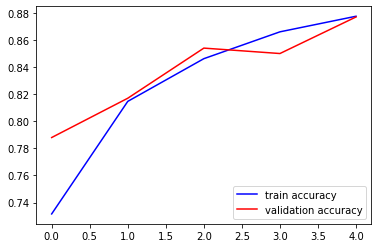

In [ ]:
plt.plot(history_embedding.history['accuracy'], c = 'b', label = 'train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

**Evaluate the model by testing on test set**

In [ ]:
y_pred = np.argmax(model.predict(X_test_pad), axis = 1)
y_true = np.argmax(y_test, axis = 1)

from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      9355
           1       0.90      0.84      0.87     10645

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Sentimental Analysis Amazon Reviews/model.h5')

**Sample Predictions**

In [ ]:
test1 = ["This is the best pesticide I have ever used, kills pesticide in a manner that you can't imagine",
         "Please don't go for this medicine, Though it produces immediate relief, it causes various side effects that may even kill you",
         "This song hit millons of likes",
         "The mobile broke when hit very slightly"]
testdf = pd.DataFrame({"review":test1})
X_test = tokenizer.texts_to_sequences(testdf.review)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
y_pred = np.argmax(model.predict(X_test_pad), axis = 1)
y_pred

array([1, 0, 1, 0])